## Welcome
    this version:
    simpleimputer - most_frequent

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# Basics

In [3]:
raw = pd.read_csv("/kaggle/input/marketing-strategy-personalised-offer/train_data.csv")

In [4]:
# custom functions

def sortna(frame):
    return frame.isna().sum().sort_values(ascending=False)

## Data statistics

In [5]:
raw.shape, raw.dtypes.sort_values().value_counts()

((12379, 31),
 object    18
 int64     13
 dtype: int64)

In [6]:
raw.isna().sum().sort_values(ascending=False)

car                                     12268
no_visited_Cold drinks                    198
Restaur_spend_greater_than20              160
no_Take-aways                             144
Restaur_spend_less_than20                 121
no_visited_bars                            93
drop location                               0
Climate                                     0
Travel Time                                 0
is foodie                                   0
temperature                                 0
visit restaurant with rating (avg)          0
has Children                                0
Prefer home food                            0
restuarant_opposite_direction_house         0
Job/Job Industry                            0
offer expiration                            0
Cooks regularly                             0
Qualification                               0
Customer type                               0
income_range                                0
restuarant_same_direction_house   

In [7]:
data = raw.copy()

data.drop('car', axis=1, inplace=True)
features = data.drop('Offer Accepted', axis=1)
labels = data["Offer Accepted"].copy()
features.dtypes.sort_values()

Cooks regularly                          int64
Travel Time                              int64
temperature                              int64
visit restaurant with rating (avg)       int64
has Children                             int64
restuarant_opposite_direction_house      int64
is foodie                                int64
restuarant_same_direction_house          int64
travelled_more_than_5mins_for_offer      int64
Prefer home food                         int64
Prefer western over chinese              int64
travelled_more_than_15mins_for_offer     int64
travelled_more_than_25mins_for_offer     int64
Climate                                 object
income_range                            object
Restaur_spend_greater_than20            object
no_visited_Cold drinks                  object
Restaur_spend_less_than20               object
Marital Status                          object
Job/Job Industry                        object
restaurant type                         object
Qualification

In [8]:
dd = dict(features.dtypes.sort_values())
numerical, categorical = [], []
for i in dd.keys():
    if (dd[i]=='int64'):
        numerical.append(i)
    elif (dd[i]=='O'):
        categorical.append(i)

len(categorical) + len(numerical) == len(list(features.columns))

True

In [9]:
features.isna().sum().sort_values(ascending=False)

no_visited_Cold drinks                  198
Restaur_spend_greater_than20            160
no_Take-aways                           144
Restaur_spend_less_than20               121
no_visited_bars                          93
offer expiration                          0
Qualification                             0
drop location                             0
Climate                                   0
Travel Time                               0
temperature                               0
visit restaurant with rating (avg)        0
has Children                              0
restuarant_opposite_direction_house       0
Job/Job Industry                          0
is foodie                                 0
Cooks regularly                           0
Customer type                             0
income_range                              0
restuarant_same_direction_house           0
gender                                    0
travelled_more_than_5mins_for_offer       0
travelled_more_than_25mins_for_o

* Features and labels have been split
* Features have categorical and numerical values
* Missing values are only in the categorical features
    * Since feature 'car' has the NA values comparable to data, thus can be dropped

In [10]:
features.dtypes.value_counts(), labels.unique()

(object    16
 int64     13
 dtype: int64,
 array(['No', 'Yes'], dtype=object))

# Data preprocessing

## Feature imputation

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
si = SimpleImputer(strategy="most_frequent")
features = pd.DataFrame(si.fit_transform(features), columns=[features.columns])
print("done")

done


In [13]:
features.isna().sum()

offer expiration                        0
income_range                            0
no_visited_Cold drinks                  0
travelled_more_than_15mins_for_offer    0
Restaur_spend_less_than20               0
Marital Status                          0
restaurant type                         0
age                                     0
Prefer western over chinese             0
travelled_more_than_25mins_for_offer    0
travelled_more_than_5mins_for_offer     0
no_visited_bars                         0
gender                                  0
restuarant_same_direction_house         0
Cooks regularly                         0
Customer type                           0
Qualification                           0
is foodie                               0
no_Take-aways                           0
Job/Job Industry                        0
restuarant_opposite_direction_house     0
has Children                            0
visit restaurant with rating (avg)      0
temperature                       

In [14]:
count=0
for i in features.columns:
    if (len(features[i].unique())==1):
        features.drop(i, axis=1, inplace=True)
        count+=1
print("features dropped =", count)

features dropped = 1


**Features imputation done, now we can apply encoders**
**Categorical features should be divided into ordinal and nominal and encoders should be applied accordingly**

In [15]:
unique = {}
for i in features[categorical]:
    unique[i] = features[i].unique()
    
pd.DataFrame(data=unique.items(), columns=['columns', 'count of unique values'])

,columns,count of unique values
0,"(Climate,)","[Spring, Summer, Winter]"
1,"(income_range,)","[₹100000 or More, ₹87500 - ₹99999, ₹37500 - ₹4..."
2,"(Restaur_spend_greater_than20,)","[less1, 1~3, never, gt8, 4~8]"
3,"(no_visited_Cold drinks,)","[4~8, less1, never, 1~3, gt8]"
4,"(Restaur_spend_less_than20,)","[less1, 4~8, 1~3, gt8, never]"
5,"(Marital Status,)","[Married partner, Single, Divorced, Unmarried ..."
6,"(Job/Job Industry,)","[Unemployed, Arts Design Entertainment Sports ..."
7,"(restaurant type,)","[4 star restaurant, Take-away restaurant, Cold..."
8,"(Qualification,)","[Bachelors degree, Some college - no degree, G..."
9,"(Customer type,)","[Individual, With Family, With Kids, With Coll..."


In [16]:
features['age'].value_counts()

(age,) 
21         2602
26         2543
31         1929
50plus     1756
36         1259
41         1060
46          716
below21     514
dtype: int64

**We can group ages into bins of below 21, 21-50 and above 50**

In [17]:
agebins = features['age'].copy()

for i in range(len(agebins)):
    x = (agebins.loc[i,'age'])[0]
    if (x=='50plus' or x=='below21'):
        pass
    else:
        agebins['age'].replace(x, '21to50', inplace=True)
agebins['age'].value_counts()

(age,) 
21to50     10109
50plus      1756
below21      514
dtype: int64

In [18]:
features.drop('age', axis=1, inplace=True)
features['age'] = agebins
features['age'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


(age,) 
21to50     10109
50plus      1756
below21      514
dtype: int64

In [19]:
nomord = {}
for i in categorical:
    nomord[i] = features[(i,)].unique()
pd.DataFrame(nomord.items(), columns=['features', 'unique values'])

,features,unique values
0,Climate,"[Spring, Summer, Winter]"
1,income_range,"[₹100000 or More, ₹87500 - ₹99999, ₹37500 - ₹4..."
2,Restaur_spend_greater_than20,"[less1, 1~3, never, gt8, 4~8]"
3,no_visited_Cold drinks,"[4~8, less1, never, 1~3, gt8]"
4,Restaur_spend_less_than20,"[less1, 4~8, 1~3, gt8, never]"
5,Marital Status,"[Married partner, Single, Divorced, Unmarried ..."
6,Job/Job Industry,"[Unemployed, Arts Design Entertainment Sports ..."
7,restaurant type,"[4 star restaurant, Take-away restaurant, Cold..."
8,Qualification,"[Bachelors degree, Some college - no degree, G..."
9,Customer type,"[Individual, With Family, With Kids, With Coll..."


**From above, we separate ordinal features for OrdinalEncoder and nominal features for OneHotEncoder**

    Indices for 
        Ordinal = 1, 2, 3, 4, 8, 11, 13, 14, 15

In [20]:
ordinal = [categorical[i] for i in [1,2,3,4,8,11,13,14,15]]
nominal = [i for i in categorical if i not in ordinal]
len(ordinal), len(nominal)

(9, 7)

In [21]:
count = 0
for i in nominal:
    count += len(features[(i,)].unique())
print("unique values in nominal features =", count)

unique values in nominal features = 47


**47 unique columns from nominal features and 9 from ordinal features should finally give us 56 columns for categorical features**

In [22]:
ord_cols = {}
for i in ordinal:
    ord_cols[i] = features[(i,)].unique()
pd.DataFrame(ord_cols.items(), columns=['features', 'unique values'])

,features,unique values
0,income_range,"[₹100000 or More, ₹87500 - ₹99999, ₹37500 - ₹4..."
1,Restaur_spend_greater_than20,"[less1, 1~3, never, gt8, 4~8]"
2,no_visited_Cold drinks,"[4~8, less1, never, 1~3, gt8]"
3,Restaur_spend_less_than20,"[less1, 4~8, 1~3, gt8, never]"
4,Qualification,"[Bachelors degree, Some college - no degree, G..."
5,age,"[21to50, 50plus, below21]"
6,no_visited_bars,"[less1, never, 1~3, 4~8, gt8]"
7,no_Take-aways,"[1~3, gt8, 4~8, less1, never]"
8,offer expiration,"[2days, 10hours]"


**Specifying categories for ordinal features for OrdinalEncoding**

In [23]:
ordd = {
    'income_range': ['Less than ₹12500', '₹12500 - ₹24999', '₹25000 - ₹37499', '₹37500 - ₹49999', '₹50000 - ₹62499', '₹62500 - ₹74999', '₹75000 - ₹87499', '₹87500 - ₹99999', '₹100000 or More'],
    'Restaur_spend_greater_than20': ['never', 'less1', '1~3', '4~8', 'gt8'],
    'no_visited_Cold drinks': ['never', 'less1', '1~3', '4~8', 'gt8'],
    'Restaur_spend_less_than20': ['never', 'less1', '1~3', '4~8', 'gt8'], 
    'age': ['below21', '21to50', '50plus'],
    'no_visited_bars': ['never', 'less1', '1~3', '4~8', 'gt8'],
    'no_Take-aways' : ['never', 'less1', '1~3', '4~8', 'gt8'],
    'Qualification' : ['Some High School', 'High School Graduate', 'Associates degree', 'Some college - no degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)'],
    'offer expiration': ['2days', '10hours']
}

## Categorical transformers

In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [25]:
ordinaldf = features[ordinal].copy()
ordinaldf.head()

,income_range,Restaur_spend_greater_than20,no_visited_Cold drinks,Restaur_spend_less_than20,Qualification,age,no_visited_bars,no_Take-aways,offer expiration
0,₹100000 or More,less1,4~8,less1,Bachelors degree,21to50,less1,1~3,2days
1,₹87500 - ₹99999,1~3,4~8,4~8,Bachelors degree,50plus,never,1~3,2days
2,₹87500 - ₹99999,less1,less1,1~3,Bachelors degree,21to50,never,1~3,2days
3,₹37500 - ₹49999,1~3,less1,1~3,Some college - no degree,21to50,never,1~3,10hours
4,₹100000 or More,less1,never,1~3,Some college - no degree,21to50,less1,gt8,2days


In [26]:
df1, df2 = pd.DataFrame(), pd.DataFrame()
feature = list(ordd.keys())
for i in range(len(ordd)):
    category = ordd[feature[i]]
    df2 = pd.DataFrame(OrdinalEncoder(categories=[category]).fit_transform(features[feature[i]]), columns=[feature[i]])
    df1 = pd.concat([df1, df2], axis=1)

df1.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.

,income_range,Restaur_spend_greater_than20,no_visited_Cold drinks,Restaur_spend_less_than20,age,no_visited_bars,no_Take-aways,Qualification,offer expiration
0,8.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,0.0
1,7.0,2.0,3.0,3.0,2.0,0.0,2.0,4.0,0.0
2,7.0,1.0,1.0,2.0,1.0,0.0,2.0,4.0,0.0
3,3.0,2.0,1.0,2.0,1.0,0.0,2.0,3.0,1.0
4,8.0,1.0,0.0,2.0,1.0,1.0,4.0,3.0,0.0


In [27]:
ordinaldf = df1.copy()
ordinaldf.shape

(12379, 9)

In [28]:
nominaldf = features[nominal].copy()
nominaldf = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(nominaldf))
nominaldf.shape

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


(12379, 47)

In [29]:
catdf = pd.concat([ordinaldf, nominaldf], axis=1)
catdf.shape

(12379, 56)

**56 columns as predicted**

In [30]:
len(numerical)+len(catdf.columns)

69

In [31]:
for i in numerical:
    print (i)

Cooks regularly
Travel Time
temperature
visit restaurant with rating (avg)
has Children
restuarant_opposite_direction_house
is foodie
restuarant_same_direction_house
travelled_more_than_5mins_for_offer
Prefer home food
Prefer western over chinese
travelled_more_than_15mins_for_offer
travelled_more_than_25mins_for_offer


In [32]:
len(catdf.columns), len(numerical)

(56, 13)

In [33]:
transformed = pd.concat([features[numerical], catdf], axis=1)
transformed.columns = [str(i) for i in range(len(transformed.columns))]
print(transformed.head())

   0   1   2  3  4  5  6  7  8  9  ...   58   59   60   61   62   63   64  \
0  1  22  67  4  0  0  0  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
1  1  18  89  3  1  0  0  1  0  0  ...  1.0  1.0  0.0  0.0  0.0  0.0  1.0   
2  0   7  67  4  1  1  1  1  1  1  ...  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3  0   7  89  3  1  0  1  1  0  1  ...  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  0   7  40  3  0  1  1  0  0  0  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

    65   66   67  
0  0.0  1.0  0.0  
1  0.0  1.0  0.0  
2  0.0  1.0  0.0  
3  1.0  0.0  1.0  
4  1.0  1.0  0.0  

[5 rows x 68 columns]


In [34]:
transformed.shape

(12379, 68)

In [35]:
for i in transformed.columns:
    if (len(transformed[i].unique())==1):
        transformed.drop(i, axis=1, inplace=True)

transformed.columns = range(len(transformed.columns))
for i in transformed.columns:
    print(i, len(transformed[i].unique()))

0 2
1 5
2 3
3 5
4 2
5 2
6 2
7 2
8 2
9 2
10 2
11 2
12 9
13 5
14 5
15 5
16 3
17 5
18 5
19 6
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 2
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 2
44 2
45 2
46 2
47 2
48 2
49 2
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2


## Numerical Transformers

In [36]:
import seaborn as sns

In [37]:
cormat = transformed.corr()
plt.figure(figsize=(20,20))
#sns.heatmap(cormat)

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

**If the minimum value in data=0, MinMaxScaler and MaxAbsScaler work the same**

In [38]:
((transformed.describe()).loc['min']).value_counts()

0.0    56
Name: min, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
minmax, std = MinMaxScaler(), StandardScaler()

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2e2f2f350>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2e2f2fed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2e2f2f550>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2e2f34450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2e2f34b10>],
 'means': []}

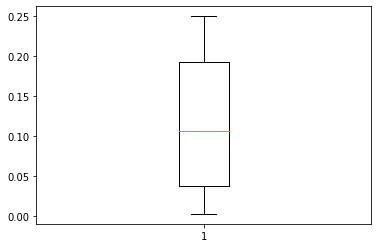

In [41]:
mm = pd.DataFrame(minmax.fit_transform(transformed))
mmvar = (pd.DataFrame(mm.var()))[0]
plt.boxplot(mmvar)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff2df47cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff2e3596450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff2df47cad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2e3596b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2e3596e50>],
 'means': []}

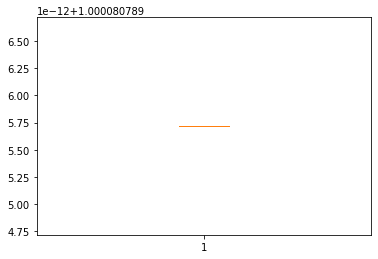

In [42]:
ss = pd.DataFrame(std.fit_transform(transformed))
ssvar = (pd.DataFrame(ss.var()))[0]
plt.boxplot(ssvar)

**Standard scaler gives a standard normal distribution**

# ML Modelling

## Baseline model

## KNN

## SVM